In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
from google.colab import files
dataset = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (1).csv


In [6]:
DATASET_NAME = "comp_bikes_mod.csv"
bikes_data_frame = pd.read_csv(DATASET_NAME)


In [26]:
bikes_data_frame.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [27]:
bikes_data_frame.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


In [6]:
bikes_data_frame.info() # instancias sao os entries e propriedades/atributos sao as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [10]:
bikes_data_frame.shape # verifica os valores nulos

(17379, 17)

In [8]:
print("vazio", bikes_data_frame.isnull().sum()) # conta os valores nulos



vazio instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64


In [7]:
bikes_data_frame_cleaned = pd.read_csv(DATASET_NAME).dropna(subset=['dteday']) # carreguei numa nova variavel e dropei os nulos da coluna dteday

bikes_data_frame_cleaned.isnull().sum() # checa os nulos de novo


instant       1581
dteday           0
season        1580
yr            1565
mnth          1579
hr            1573
holiday       1565
weekday       1563
workingday    1544
weathersit    1563
temp          1575
atemp         1565
hum           1571
windspeed     1559
casual        1570
registered    1551
cnt           1562
dtype: int64

In [15]:
bikes_data_frame_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [16]:
bikes_data_frame_cleaned.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # instancia o label encoder

bikes_data_frame_cleaned['season'] = label_encoder.fit_transform(bikes_data_frame_cleaned['season'])

bikes_data_frame_cleaned.head(50)

season_categories = pd.Series(bikes_data_frame_cleaned['season']).drop_duplicates().tolist() # metodo pra ver somente valores unicos no array


[   0    1    2 ... 1581 1582 1583]


In [67]:
bikes_data_frame_cleaned['dteday'] = pd.to_datetime(bikes_data_frame_cleaned['dteday'])

bikes_data_frame_cleaned.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17373,17374.0,2012-12-31,0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,112,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,1583,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


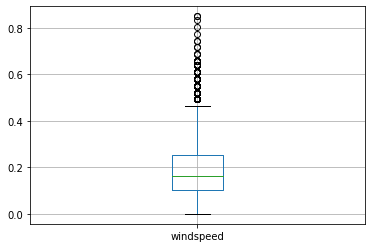

In [69]:
bikes_data_frame_cleaned[['windspeed']].boxplot() # plotei

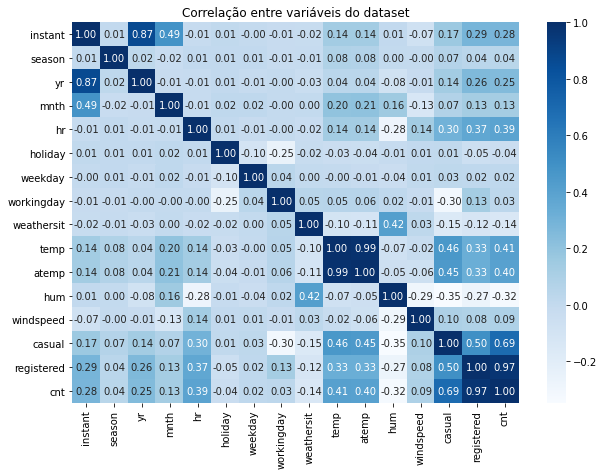

-0.32340948706626077

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7)) # seta o tamanho da figura

sns.heatmap(bikes_data_frame_cleaned.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues') # cria o heatmap
plt.title('Correlação entre variáveis do dataset') # titulo do heatmap
plt.show() # mostra o heatmap


bikes_data_frame_cleaned['hum'].corr(bikes_data_frame['cnt']) # buscando correlcao direta entre duas variaveis

In [12]:
bikes_data_frame_cleaned.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,1.0,0.22,0.2727,NaN,NaN,2.0,0.0,2.0
7,8.0,2011-01-01,1.0,0.0,1.0,7.0,0.0,6.0,0.0,NaN,0.20,0.2576,0.86,0.0000,NaN,2.0,3.0
8,9.0,2011-01-01,1.0,0.0,1.0,8.0,0.0,NaN,0.0,NaN,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10.0,2011-01-01,1.0,0.0,NaN,9.0,0.0,6.0,0.0,1.0,NaN,0.3485,0.76,0.0000,8.0,6.0,14.0
10,11.0,2011-01-01,1.0,0.0,NaN,10.0,0.0,6.0,0.0,1.0,0.38,0.3939,0.76,0.2537,12.0,24.0,36.0


In [14]:
values = {'hum': bikes_data_frame_cleaned['hum'].mean(), 'cnt': bikes_data_frame_cleaned['cnt'].mean(), 'casual': bikes_data_frame_cleaned['casual'].mean()} # ajustando as medias
bikes_data_frame_mean_applied = bikes_data_frame_cleaned.fillna(value=values) #aplicando

In [21]:
from sklearn.linear_model import LinearRegression

x = bikes_data_frame_mean_applied[['hum', 'casual']] # dependente
y = bikes_data_frame_mean_applied['cnt'] # dependente

reg = LinearRegression()

regressao = reg.fit(x, y)

In [23]:
previsao=reg.predict(x) # finaliza a previsa ?

In [24]:
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

#parâmetros encontrados
print('Y = {} X = {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-99.75012328   2.21512197] X = 173.29337505135578
Coeficiente de Determinação (R2): 0.4059859251122173


In [42]:
from sklearn.tree import DecisionTreeClassifier # decision tree do scikit learn
from sklearn import preprocessing

clf = DecisionTreeClassifier() # instanciei


x_tree = bikes_data_frame_mean_applied[['hum', 'casual']] # dependente
y_tree = bikes_data_frame_mean_applied['cnt'] # dependente

print("eita porran", x_tree.values)

lab_enc = preprocessing.LabelEncoder()
encoded_x_hum = lab_enc.fit_transform(x_tree['hum'])
encoded_x_casual = lab_enc.fit_transform(x_tree['casual'])

encoded_y = lab_enc.fit_transform(y_tree)

regressao_tree = clf.fit([encoded_x_hum, encoded_x_casual], encoded_y)

previsao_tree = clf.predict(x_tree)

R_2_tree = r2_score(y_tree, previsao_tree)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2_tree)


eita porran [[ 0.8         8.        ]
 [ 0.8         5.        ]
 [ 0.75        3.        ]
 ...
 [ 0.6        35.41631725]
 [ 0.56       13.        ]
 [ 0.65       12.        ]]


ValueError: ignored